# DEV DHARMESH PATEL


### Project Description: Website A/B Testing for Conversion Optimization

# Problem:
An e-commerce startup wants to know if a new checkout funnel (B) outperforms the old one (A).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
np.random.seed(42)

# Data Simulation:
Objective: Simulate visit and purchase data for both the old funnel (A) and new funnel (B).



In [ ]:
# Assume 10,000 visitors each
n_A = 10000
n_B = 10000
P_A = 0.10
P_B = 0.12

Conclusion

Simulated 10,000 visitors for both Variant A and B.

Conversion rate set at 10% for A and 12% for B.

# Conversion Rate Calculation:

In [ ]:
#Simulate  number of purchases
success_A = np.random.binomial(n_A,P_A)
success_B = np.random.binomial(n_B,P_B)

In [ ]:
print(success_A,success_B)

973 1134


Conclusion

Variant A: 973 purchases out of 10,000 visits → Conversion Rate (CR) = 9.73%

Variant B: 1134 purchases out of 10,000 visits → CR = 11.34%

# Confidence Intervals (95%):


In [ ]:
def proportion(success,n,alpha=0.05):
    p_hat = success/n
    z = stats.norm.ppf(1 - alpha/2)
    se = np.sqrt(p_hat * (1- p_hat)/n)
    return p_hat,p_hat - z*se,p_hat+z*se

- n: The total number of visitors.
 alpha: The significance level (defaulting to 0.05 for a 95% confidence interval).

- p_hat: The calculated conversion rate (successes / n).

- z: The z-score corresponding to the desired confidence level (e.g., for a 95% CI, you need the z-score that leaves 2.5% in each tail, which is calculated using stats.norm.ppf).

- se: The standard error of the proportion.

In [ ]:
p_A_hat,ci_low_A,ci_high_A = proportion(success_A,n_A)
p_B_hat,ci_low_B,ci_high_B = proportion(success_B,n_B)

In [ ]:
print(p_A_hat,ci_low_A,ci_high_A)
print(p_B_hat,ci_low_B,ci_high_B )

0.0973 0.09149133631051884 0.10310866368948116
0.1134 0.1071853241430106 0.1196146758569894


In [ ]:
results = pd.DataFrame({
    'Variant': ['A','B'],
    'Visitors': [n_A,n_B],
    'Conversions': [success_A,success_B],
    'CR(p_hat)': [p_A_hat,p_B_hat],
    'CI Lower (95%)':[ci_low_A, ci_low_B],
    'CI Upper (95%)':[ci_high_A,ci_high_B],
})

In [ ]:
results

,Variant,Visitors,Conversions,CR(p_hat),CI Lower (95%),CI Upper (95%)
0,A,10000,973,0.0973,0.091491,0.103109
1,B,10000,1134,0.1134,0.107185,0.119615


Conclusion:

The below are the 95% confidence interval range

A: [9.15%, 10.31%]

B: [10.72%, 11.96%]

Confidence intervals do not overlap, suggesting a real difference in performance.

# Plotting

<BarContainer object of 2 artists>

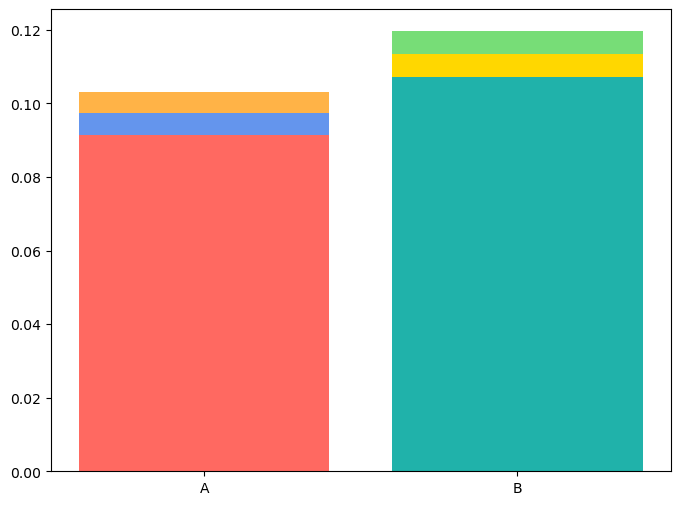

In [ ]:
plt.figure(figsize=(8,6))

plt.bar(
    results['Variant'],
    results['CI Upper (95%)'],
    capsize=5,
    color=['#FFB347', '#77DD77']  # orange, light green
)
plt.bar(
    results['Variant'],
    results['CR(p_hat)'],
    capsize=5,
    color=['#6495ED', '#FFD700']  # cornflower blue, gold
)
plt.bar(
    results['Variant'],
    results['CI Lower (95%)'],
    capsize=5,
    color=['#FF6961', '#20B2AA']  # pastel red, light sea green
)

Conclusion:

Error bars were plotted to visualize confidence intervals for both groups.

This plot helps visually confirm that Variant B performs better than A with statistically significant separation.

# Two-Proportion Z-Test:

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
count = np.array([success_B,success_A])
nobs = np.array([n_A,n_B])
z_stat, p_value = proportions_ztest(count,nobs,alternative = 'larger')
print(f"Z-statistic : {z_stat:.3f}")
print(f"P-value: {p_value:.3f}")

Z-statistic : 3.708
P-value: 0.000


In [ ]:
## condition for hypothesis
if p_value < 0.05:
    print("Reject H0: Variant B have significantly higher conversion rate then Varient A")
else:
    print("Fai to reject H0: Variant B does not have higher conversion rate then Varient A")


Reject H0: Variant B have significantly higher conversion rate then Varient A


h0 - p_b <= p_a vs h1 - p_b > p_a (design test)


Conclusion:

Z-statistic: 3.708

P-value: 0.000

Result: Statistically significant improvement in Variant B over A.

# Real-Time Monitoring / Sequential Testing:

In [ ]:
import time

In [ ]:
true_p_A,true_p_B = 0.10,0.12
batch_size = 100
n_batches = 60

n_visits_A = n_visits_B = 0
n_succ_A = n_succ_B = 0

batches = []
p_values = []
lifts = []

SD = 0
NSD = 0
for batch in range(1,n_batches+1):
    new_A = np.random.binomial(batch_size,true_p_A)
    new_B = np.random.binomial(batch_size,true_p_B)

    n_visits_A += batch_size
    n_visits_B += batch_size
    n_succ_A += new_A
    n_succ_B += new_B

    cr_A = n_succ_A/n_visits_A
    cr_B = n_succ_B/n_visits_B
    lift = cr_B - cr_A
      # Two-proportion z-test (one-sided: B > A)
    count = np.array([n_succ_B,n_succ_A])
    nobs = np.array([n_visits_B,n_visits_A])
    z_stat, p_value = proportions_ztest(count,nobs,alternative = 'larger')

    batches.append(batch)
    p_values.append(p_value)
    lifts.append(lift)

print(f"Batch {batch}/{n_batches}")
print(f" Variant A: {n_visits_A} visits, {n_succ_A} buys -> CR = {cr_A:.3%}")
print(f" Variant B: {n_visits_B} visits, {n_succ_B} buys -> CR = {cr_B:.3%}")
print(f" Observed lift: {lift:.3%}")
print(f" z-stat = {z_stat:.2f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Significant lift detected (p<0.05).")
else:
    print("No significant lift yet.")

Batch 60/60
 Variant A: 6000 visits, 574 buys -> CR = 9.567%
 Variant B: 6000 visits, 714 buys -> CR = 11.900%
 Observed lift: 2.333%
 z-stat = 4.13, p-value = 0.0000
Significant lift detected (p<0.05).


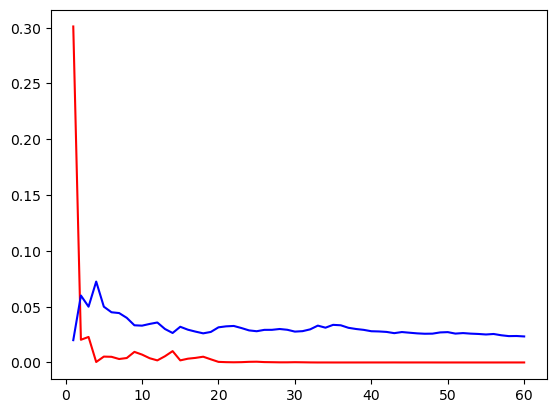

In [ ]:
plt.plot(batches,p_values,'-r')
plt.plot(batches,lifts,'-b')
plt.show()

Conclusion:

Simulated sequential batches (up to 60).

At batch 60 (6000 visitors per variant), a significant lift of 2.33% was observed.

Final Z-stat: 4.13, p-value: 0.0000 → Confirms significance during real-time monitoring.

# Final Conclusion

The A/B test clearly demonstrates that Variant B (new checkout funnel) significantly outperforms Variant A (old funnel):

Conversion Rate improved by ~1.61 percentage points.

Confidence intervals do not overlap, supporting the result.

P-value < 0.05, rejecting the null hypothesis.

Real-time monitoring further confirmed this improvement.

Decision: Adopt Variant B — it delivers a statistically significant and measurable improvement in conversion rate.

